<a href="https://colab.research.google.com/github/kushal2022/Pytorch/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic PyTorch

In [ ]:
import torch

weights = torch.tensor([0.2126, 0.7152, 0.0722], requires_grad=True)

for epoch in range(10):
  model_output = (weights * 3).sum()

  model_output.backward()

  print(weights.grad)

  weights.grad.zero_()

tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])


In [ ]:
weights = torch.tensor([0.2126, 0.7152, 0.0722], requires_grad=True)

# Wrap the weights tensor in a list to make it an iterable
optimizer = torch.optim.SGD([weights], lr=0.01)

for epoch in range(10):
  model_output = (weights * 3).sum()

  model_output.backward()

  print(weights.grad)

  optimizer.step()

  optimizer.zero_grad()

tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])


**Back propagation example with pytorch**

In [ ]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

# forward pass and compute the loss
y_hat = w * x
loss = (y_hat - y)**2

print(loss)

# backward pass
loss.backward()
print(w.grad)

### update weights
### next forward and backward

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


* Prediction : Pytorch Model
* Gradients Computation : Autograd
* Loss Computation : Pytorch Loss
* Parameter Updates : Pytorch Optimizer

In [2]:
import numpy as np

# Linear function
# f = w * x
# f = 2 * x

X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# Model Prediction
def forward(x):
  return w * x

# Loss = MSE
def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

# Gradient
# MSE = 1/N * (w * x - y)**2
# dJ/dw = 1/N 2*(w * x - y)
def gradient(x, y, y_pred):
  return np.dot(2*x, y_pred - y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients
  dw = gradient(X, Y, y_pred)

  # update wieghts
  w -= learning_rate * dw

  if epoch % 2 == 0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050332
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [6]:
import torch

# Linear function
# f = w * x
# f = 2 * x

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# Model Prediction
def forward(x):
  return w * x

# Loss = MSE
def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients = backward pass
  l.backward() # dl/dw

  # update wieghts
  with torch.no_grad():
    w -= learning_rate * w.grad

  # zero gradients
  w.grad.zero_()

  if epoch % 2 == 0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018772
epoch 5: w = 1.113, loss = 8.17471695
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698116
epoch 15: w = 1.825, loss = 0.31684780
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
epoch 21: w = 1.934, loss = 0.04506890
epoch 23: w = 1.952, loss = 0.02352631
epoch 25: w = 1.966, loss = 0.01228084
epoch 27: w = 1.975, loss = 0.00641066
epoch 29: w = 1.982, loss = 0.00334642
epoch 31: w = 1.987, loss = 0.00174685
epoch 33: w = 1.991, loss = 0.00091188
epoch 35: w = 1.993, loss = 0.00047601
epoch 37: w = 1.995, loss = 0.00024848
epoch 39: w = 1.996, loss = 0.00012971
epoch 41: w = 1.997, loss = 0.00006770
epoch 43: w = 1.998, loss = 0.00003534
epoch 45: w = 1.999, loss = 0.00001845
epoch 47: w = 1.999, loss = 0.00000963
epoch 49: w = 1.999, loss 

1. Design model (input size, output size, forward pass)
2. Construct the loss and optimizer
3. Training loop
  - forward pass : compute prediction
  - backward pass : gradients
  - update the weights

In [1]:
import torch
import torch.nn as nn

# Linear function
# f = w * x
# f = 2 * x

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape
input_size = n_features
output_size = n_features

#model = nn.Linear(1, 1)

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    # define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')



# Training
learning_rate = 0.01
n_iters = 1000

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = model(X)

  # loss
  l = loss(Y, y_pred)

  # gradients = backward pass
  l.backward() # dl/dw

  # update wieghts
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  if epoch % 10 == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

NameError: name 'model' is not defined

**Linear Regressing using pytorch inbuild library**

epoch: 10, loss = 4294.2295
epoch: 20, loss = 3204.2532
epoch: 30, loss = 2416.1035
epoch: 40, loss = 1845.5670
epoch: 50, loss = 1432.1323
epoch: 60, loss = 1132.2546
epoch: 70, loss = 914.5510
epoch: 80, loss = 756.3747
epoch: 90, loss = 641.3632
epoch: 100, loss = 557.6791


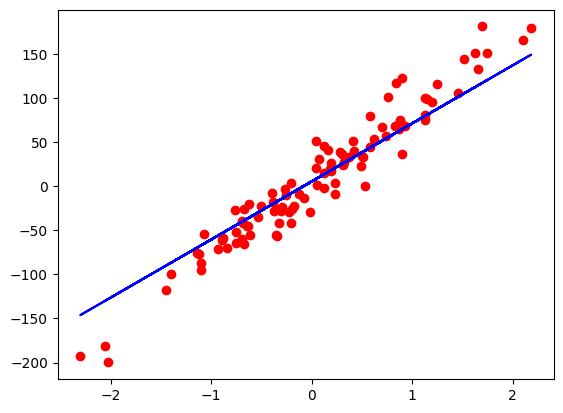

In [2]:
from ast import Num
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

#prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape


#model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

#loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#training loop
num_epochs = 100
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted, y)

  #backward pass
  loss.backward()

  #updates
  optimizer.step()

  #zero gradients
  optimizer.zero_grad()

  if((epoch+1) % 10 == 0):
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

#plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

**Logistic Regression using Pytorch**

* preparing the data
* model
* loss and optimizer
* Traning loop

In [9]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
#print(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#scale the feature
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

#model
#f = wx + b, and apply sigmoid at the end

class LogisticRegression(nn.Module):

  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features)

#Loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#traning loop
num_epochs = 100
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted = model(X_train)

  loss = criterion(y_predicted, y_train)

  #backward pass
  loss.backward()

  #updates
  optimizer.step()

  #zero gradients
  optimizer.zero_grad()

  if((epoch+1) % 10 == 0):
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accuracy = {acc:.4f}')

epoch: 10, loss = 0.5349
epoch: 20, loss = 0.4453
epoch: 30, loss = 0.3872
epoch: 40, loss = 0.3466
epoch: 50, loss = 0.3165
epoch: 60, loss = 0.2932
epoch: 70, loss = 0.2746
epoch: 80, loss = 0.2593
epoch: 90, loss = 0.2464
epoch: 100, loss = 0.2354
accuracy = 0.9035


**Dataset and Dataloader**

epoch = 1 forward and backward pass of all training samples

batch size = number of traning samples in one forward and backward pass

number of iterations = number of passes, each pass using [batch_size] number of samples

eg. 100 samples, batch_size = 20 that means 5 iterations for 1 epoch

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):

**Softmax and Entropy**

In [1]:
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
print('softmax torch:', outputs)

softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch: tensor([0.6590, 0.2424, 0.0986])


**FeedForward Network with MNIST data**
1. DataLoader, Transformation
2. Multilayer Neural Net, Activation function
3. Loss and Optimizer
4. Traning Loop (batch training)
5. Model evaluation
6. GPU support


torch.Size([100, 1, 28, 28]) torch.Size([100])


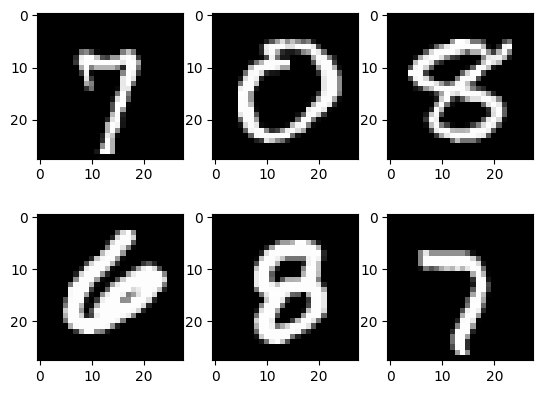

In [7]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyeper parameters
input_size = 784 # 28 * 28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [8]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

In [9]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 100, 1, 28, 28
    # 100, 784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

# testing
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    # value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc}')

epoch 1 / 2, step 100/600, loss = 0.5219
epoch 1 / 2, step 200/600, loss = 0.2497
epoch 1 / 2, step 300/600, loss = 0.2940
epoch 1 / 2, step 400/600, loss = 0.1610
epoch 1 / 2, step 500/600, loss = 0.2371
epoch 1 / 2, step 600/600, loss = 0.2853
epoch 2 / 2, step 100/600, loss = 0.2516
epoch 2 / 2, step 200/600, loss = 0.1434
epoch 2 / 2, step 300/600, loss = 0.1487
epoch 2 / 2, step 400/600, loss = 0.1147
epoch 2 / 2, step 500/600, loss = 0.1153
epoch 2 / 2, step 600/600, loss = 0.1991
accuracy = 95.22
